## MNIST softmax  
tf.stop_gradient는 network의 특정 파트만 학습시키고 싶을 때 사용할 수 있다.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost:5.007828803
Epoch: 0011, Cost:0.480426253
Epoch: 0021, Cost:0.358854970
Epoch: 0031, Cost:0.310642639
Epoch: 0041, Cost:0.285271341
Learning Finished
Accuracy: 0.9133
Label: [2]
Prediction:  [3]


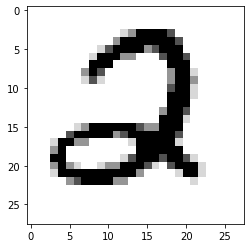

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) # for reproducibility

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
        )
    ) # Y는 변화시키지 않는다는 의미인거 같다


train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        if epoch % 10 == 0:    
            print(f'Epoch: {(epoch+1):04d}, Cost:{avg_cost:.9f}')
        
    print('Learning Finished')
    
    print(
        'Accuracy:',
        sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
    )
    
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print('Label:', sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        'Prediction: ',
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X:mnist.test.images[r : r + 1]}
        )
    )
    
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest'
    )
    
    plt.show()

In [6]:
print(mnist.test.images[r].shape)
print(mnist.test.images[r:r+1].shape)

(784,)
(1, 784)


## MNIST NN using ReLU

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 167.715418351
Epoch: 0002 cost = 41.625966072
Epoch: 0003 cost = 25.883558266
Epoch: 0004 cost = 17.913293060
Epoch: 0005 cost = 13.084635880
Epoch: 0006 cost = 9.841317665
Epoch: 0007 cost = 7.515251710
Epoch: 0008 cost = 5.792110906
Epoch: 0009 cost = 4.351602343
Epoch: 0010 cost = 3.210373206
Epoch: 0011 cost = 2.588291361
Epoch: 0012 cost = 1.845477372
Epoch: 0013 cost = 1.337907360
Epoch: 0014 cost = 1.096201982
Epoch: 0015 cost = 0.954828960
Learning Finished!
Accuracy: 0.9489
Label:  [7]
Prediction:  [7]


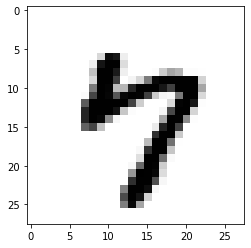

In [9]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

## MNIST NN with xavier initialization

C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\f

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch: 1, cost = 0.626353765
epoch: 2,

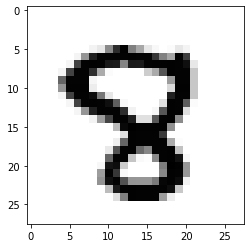

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable('W1', shape=[784, 256],
                      initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable('W2', shape=[256, 256],
                      initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable('W3', shape=[256, 10],
                      initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.nn.relu(tf.matmul(L2, W3) + b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                        logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print(f'epoch: {(epoch + 1)}, cost = {avg_cost:.9f}')
    
print('Learning Finished!')

# accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
            X:mnist.test.images, Y:mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print('Prediction: ', sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
            cmap='Greys', interpolation = 'nearest')
plt.show()

## MNIST Deep NN

C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\f

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost = 0.295805436
Epoch: 

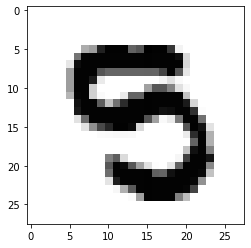

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), 
           cmap='Greys', interpolation='nearest')
plt.show()

deep하지 않았을때보다 accuracy 낮음. 아마도 overfitting 때문일 듯 하다

## Dropout

C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ui88g\anaconda3\envs\tf113\lib\site-packages\tensorflow\python\f

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input

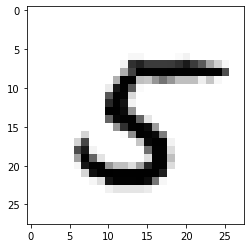

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), 
           cmap='Greys', interpolation='nearest')
plt.show()
